#  <span style = 'color: #c71585'> Dataset</span>

The dataset I will use is the IMDB movie reviews dataset available on Kaggle. IMDB Dataset of 50K Movie Reviews

* Load the dataset and do initial exploration to understand its structure and content.

In [ ]:
# Import the dataset

import pandas as pd
import numpy as np
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from gensim import corpora
from gensim.models import LdaModel
from pprint import pprint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fatma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fatma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Find the current path
import os
path= os.getcwd()
print(path)

C:\Users\fatma\Desktop\Kodlasam Veri Bilimi\Makine öğrenimi projeler\NLP


In [ ]:
df = pd.read_csv("asset-v1_Kodlasam+DS_02+2023_07_05+type@asset+block@IMDB_Dataset.csv",encoding = "utf-8")

In [ ]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
df.isna().sum() # Checking for any missing values

review       0
sentiment    0
dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

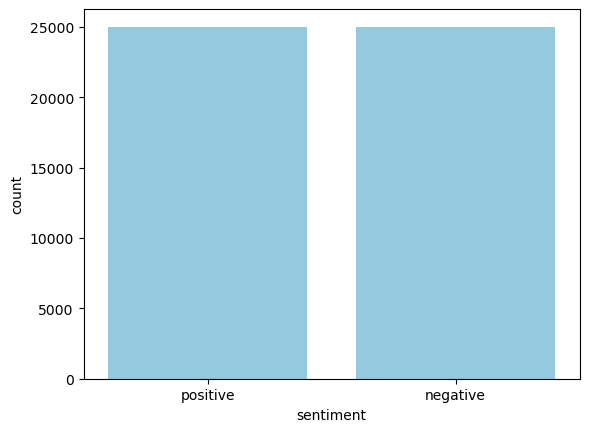

In [ ]:
sns.countplot(data=df, x="sentiment", color="skyblue")


#### <span style = 'color: purple'> This graphic shows that, positive and negative sentiments are equal.</span>

In [ ]:
df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

## <span style = 'color: #c71585'> Text data by removing HTML tags, special characters and stop words clear it.</span>

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
def remove_br_tags(text):
    cleaned_text = text.replace('<br />', '')
    return cleaned_text

df['review']= df['review'].apply(remove_br_tags)

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def punct_free(text):
    punct_free = [x for x in text if x not in string.punctuation]
    punct_free = ''.join(punct_free)
    return punct_free

In [ ]:
df["review"] = df['review'].apply(punct_free)

In [ ]:
df.review[1]

'A wonderful little production The filming technique is very unassuming very oldtimeBBC fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece The actors are extremely well chosen Michael Sheen not only has got all the polari but he has all the voices down pat too You can truly see the seamless editing guided by the references to Williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece A masterful production about one of the great masters of comedy and his life The realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears It plays on our knowledge and our senses particularly with the scenes concerning Orton and Halliwell and the sets particularly of their flat with Halliwells murals decorating every surface are terribly well done'

In [ ]:
# Let's get the list of English stop words

stop_words = set(stopwords.words('english'))

In [ ]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
# Function to remove stop words

def remove_stop_words(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

# Applying dataframe
df['review'] = df['review'].apply(remove_stop_words)

print(df)

                                                  review sentiment
0      One reviewers mentioned watching 1 Oz episode ...  positive
1      wonderful little production filming technique ...  positive
2      thought wonderful way spend time hot summer we...  positive
3      Basically theres family little boy Jake thinks...  negative
4      Petter Matteis Love Time Money visually stunni...  positive
...                                                  ...       ...
49995  thought movie right good job wasnt creative or...  positive
49996  Bad plot bad dialogue bad acting idiotic direc...  negative
49997  Catholic taught parochial elementary schools n...  negative
49998  Im going disagree previous comment side Maltin...  negative
49999  one expects Star Trek movies high art fans exp...  negative

[50000 rows x 2 columns]


### <span style = 'color: #c71585'> Tokenize comments and convert them to lowercase.</span>

In [ ]:
# Lower case conversation

df['review'] = df['review'].str.lower()

In [ ]:
# Tokenize Function

def tokenize_text(text):
    return word_tokenize(text)

# Applying dataframe
df['tokens'] = df['review'].apply(tokenize_text)

In [ ]:
df.head(3)

,review,sentiment,tokens
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn..."
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su..."


In [ ]:
df.tokens[2][:6]

['thought', 'wonderful', 'way', 'spend', 'time', 'hot']

### <span style = 'color: #c71585'> Apply Stemming or Lemmatization to reduce words to their root form.</span>

In [ ]:
# Stemming Function

stemmer = PorterStemmer()

In [ ]:
df['stemmer'] = df['review'].apply(
    lambda sentence: ' '.join([stemmer.stem(word) for word in word_tokenize(sentence)]))

In [ ]:
df.head(3)

,review,sentiment,tokens,stemmer
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",one review mention watch 1 oz episod youll hoo...
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...",wonder littl product film techniqu unassum old...
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",thought wonder way spend time hot summer weeke...


In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
# Initialize the WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [ ]:
# Define a function to lemmatize text

def lemmatize_text(text):
    # Tokenize the text into words
    tokens = word_tokenize(text)
    # Lemmatize each token
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a string
    return " ".join(lemmatized_tokens)

In [ ]:
# Apply the function to the 'comments' column

df['lemmatized_review'] = df['review'].apply(lemmatize_text)

In [ ]:
df.head()

,review,sentiment,tokens,stemmer,lemmatized_comments
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...",one review mention watch 1 oz episod youll hoo...,one reviewer mentioned watching 1 oz episode y...
1,wonderful little production filming technique ...,positive,"[wonderful, little, production, filming, techn...",wonder littl product film techniqu unassum old...,wonderful little production filming technique ...
2,thought wonderful way spend time hot summer we...,positive,"[thought, wonderful, way, spend, time, hot, su...",thought wonder way spend time hot summer weeke...,thought wonderful way spend time hot summer we...
3,basically theres family little boy jake thinks...,negative,"[basically, theres, family, little, boy, jake,...",basic there famili littl boy jake think there ...,basically there family little boy jake think t...
4,petter matteis love time money visually stunni...,positive,"[petter, matteis, love, time, money, visually,...",petter mattei love time money visual stun film...,petter matteis love time money visually stunni...


In [ ]:
df.stemmer[2]

'thought wonder way spend time hot summer weekend sit air condit theater watch lightheart comedi plot simplist dialogu witti charact likabl even well bread suspect serial killer may disappoint realiz match point 2 risk addict thought proof woodi allen still fulli control style mani us grown lovethi id laugh one woodi comedi year dare say decad ive never impress scarlet johanson manag tone sexi imag jump right averag spirit young womanthi may crown jewel career wittier devil wear prada interest superman great comedi go see friend'

In [ ]:
df.lemmatized_review[2]

'thought wonderful way spend time hot summer weekend sitting air conditioned theater watching lighthearted comedy plot simplistic dialogue witty character likable even well bread suspected serial killer may disappointed realize match point 2 risk addiction thought proof woody allen still fully control style many u grown lovethis id laughed one woodys comedy year dare say decade ive never impressed scarlet johanson managed tone sexy image jumped right average spirited young womanthis may crown jewel career wittier devil wear prada interesting superman great comedy go see friend'

In [ ]:
df['review'] = df['stemmer']

In [ ]:
# Let'd drop Column 1

df.drop(columns=['stemmer'], inplace=True)

In [ ]:
# Let'd drop Column 2

df.drop(columns=['lemmatized_review'], inplace=True)

In [ ]:
df.drop(columns=['tokens'], inplace=True)

In [ ]:
df.head(2)

,review,sentiment
0,one review mention watch 1 oz episod youll hoo...,positive
1,wonder littl product film techniqu unassum old...,positive


## <span style = 'color: #c71585'> Sentiment Analysis</span>

In [ ]:
# We use TF-IDF vectorization to convert comments into numerical data.

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000) # We remove English stop-words
X = vectorizer.fit_transform(df['review'])

In [ ]:
y =df['sentiment'].map({'positive': 1, 'negative': 0}) # We digitize emotion labels

### <span style = 'color: purple'> Separate the data into training and testing sets.</span>



In [ ]:
# Splitting train and test datasets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###  <span style = 'color: purple'> Train logistic regression model to classify sentiment of comments. Suitable Evaluate performance using metrics.</span>

In [ ]:
# Train Logistic Regression Model

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Evaluate Model Performance

y_pred = model.predict(X_test)

In [ ]:
# Metrics

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8639
Precision: 0.8570873786407767
Recall: 0.8759674538598928
F1-score: 0.8664245755226224

Confusion Matrix:
 [[4225  736]
 [ 625 4414]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      4961
           1       0.86      0.88      0.87      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



###  <span style = 'color: purple'> Train a Random Forest classifier for the same task and compare its performance with logistics. Compare with regression model.</span>

In [ ]:
# Train a Random Forest classifier

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions with Random Forest

rf_y_pred = rf_model.predict(X_test)

In [ ]:
# Evaluate Random Forest model

print("Random Forest - Accuracy:", accuracy_score(y_test, rf_y_pred))
print("\nRandom Forest - Classification Report:\n", classification_report(y_test, rf_y_pred))
print("\nRandom Forest - Confusion Matrix:\n", confusion_matrix(y_test, rf_y_pred))

Random Forest - Accuracy: 0.8317

Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83      4961
           1       0.84      0.83      0.83      5039

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000


Random Forest - Confusion Matrix:
 [[4154  807]
 [ 876 4163]]


### <span style = 'color: purple'> Vocabulary with the most important features (words) for both positive and negative sensitivities visualize using clouds or bar charts.</span>

__1.Extract Important Features for Logistic Regression__

In [ ]:
# Get feature names from TF-IDF vectorizer

feature_names = vectorizer.get_feature_names_out()

In [ ]:
# Get coefficients from Logistic Regression

lr_coefficients = model.coef_[0]  # For binary classification

In [ ]:
# Sort coefficients for positive and negative sentiment

top_positive_indices = np.argsort(lr_coefficients)[-10:]  # Top 10 for positive
top_negative_indices = np.argsort(lr_coefficients)[:10]   # Top 10 for negative

In [ ]:
# Create DataFrames for visualization

positive_features = [(feature_names[i], lr_coefficients[i]) for i in top_positive_indices]
negative_features = [(feature_names[i], lr_coefficients[i]) for i in top_negative_indices]

In [ ]:
print("Top Positive Features:", positive_features)
print("Top Negative Features:", negative_features)

Top Positive Features: [('best', 4.16815723474984), ('superb', 4.16833862883615), ('fantast', 4.1863605328876305), ('amaz', 4.233712987759698), ('brilliant', 4.292819171993663), ('enjoy', 4.375637132158846), ('favorit', 4.385739138984605), ('perfect', 5.053808216737104), ('great', 5.9348687077420355), ('excel', 6.365455258816131)]
Top Negative Features: [('worst', -9.810333867155784), ('wast', -9.201168564706796), ('aw', -7.6569228390137685), ('bore', -6.252085976351604), ('bad', -6.157648143689576), ('terribl', -5.679016810754853), ('poor', -5.5463412347504875), ('wors', -5.224726046456941), ('poorli', -5.107291415399791), ('dull', -5.096492708174232)]


__2.Extract Feature Importances for Random Forest__

In [ ]:
# Get feature importances from Random Forest

rf_feature_importances = rf_model.feature_importances_

In [ ]:
# Sort feature importances

rf_top_indices = np.argsort(rf_feature_importances)[-10:]  # Top 10 features
rf_top_features = [(feature_names[i], rf_feature_importances[i]) for i in rf_top_indices]

In [ ]:
print("Top Features from Random Forest:", rf_top_features)

Top Features from Random Forest: [('terribl', 0.008883954395899025), ('noth', 0.00997544924647958), ('love', 0.011902972205522954), ('bore', 0.011977107023392896), ('excel', 0.012406023762606857), ('aw', 0.014931068184618444), ('great', 0.019967744632990156), ('wast', 0.02250234896907626), ('worst', 0.025722833685520835), ('bad', 0.03624614093580186)]


__3.Visualize Using Word Clouds__

In [ ]:
# Generate word clouds

def plot_wordcloud(features, title):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(dict(features))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis("off")
    plt.show()

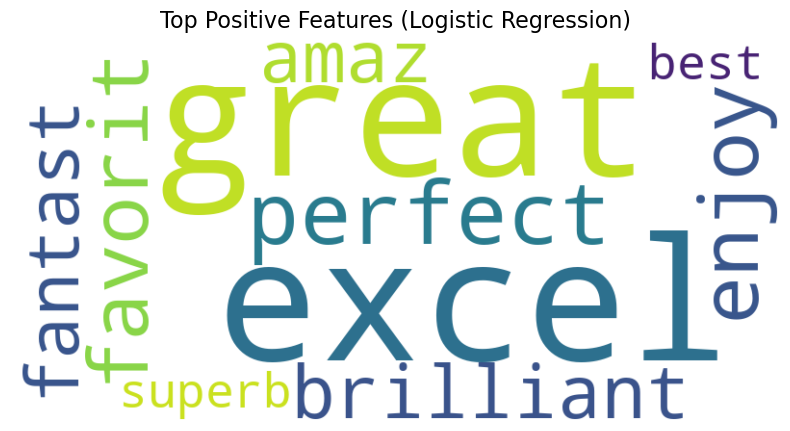

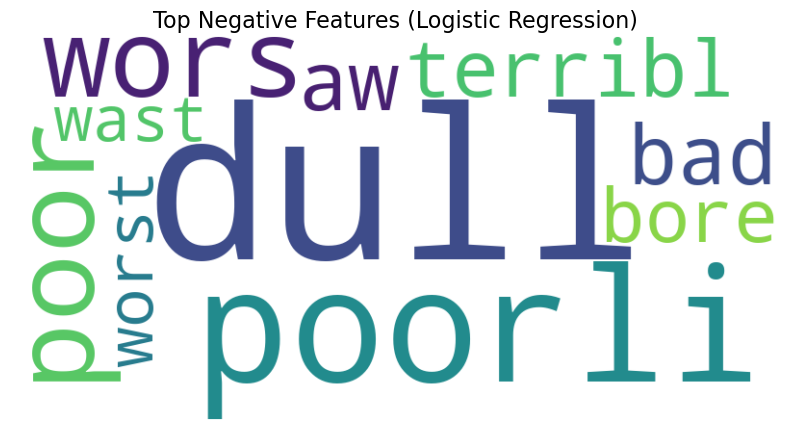

In [ ]:
# Word clouds for Logistic Regression

plot_wordcloud(positive_features, "Top Positive Features (Logistic Regression)")
plot_wordcloud(negative_features, "Top Negative Features (Logistic Regression)")

__4.Visualize Using Bar Charts__

In [ ]:
# Bar chart for Logistic Regression

def plot_bar_chart(features, title, color):
    words, scores = zip(*features)
    plt.figure(figsize=(10, 5))
    plt.barh(words, scores, color=color)
    plt.title(title, fontsize=16)
    plt.xlabel("Importance", fontsize=12)
    plt.ylabel("Words", fontsize=12)
    plt.show()

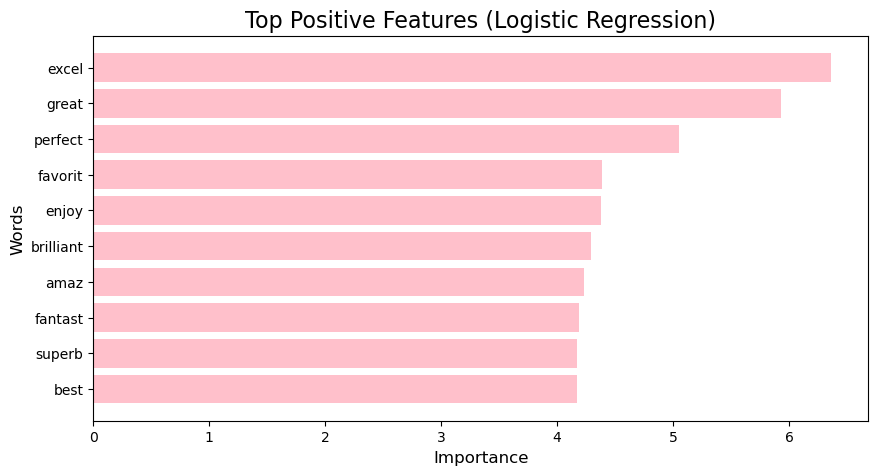

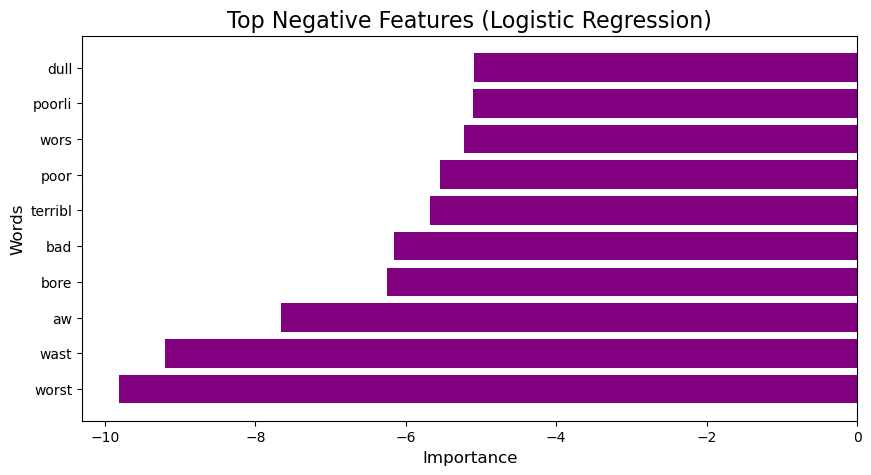

In [ ]:
# Bar charts for Logistic Regression

plot_bar_chart(positive_features, "Top Positive Features (Logistic Regression)", "pink")
plot_bar_chart(negative_features, "Top Negative Features (Logistic Regression)", "purple")

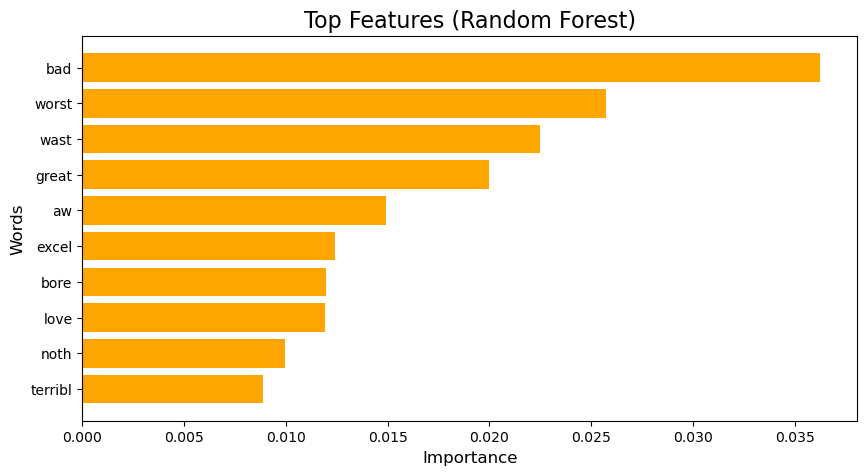

In [ ]:
# Bar chart for Random Forest

plot_bar_chart(rf_top_features, "Top Features (Random Forest)", "orange")

# <span style = 'color: #c71585'> Topic Modeling</span>

## <span style = 'color: purple'> Use Latent Dirichlet Allocation (LDA) to extract topics from comments.</span>

In [ ]:
df.head()

,review,sentiment
0,one review mention watch 1 oz episod youll hoo...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic there famili littl boy jake think there ...,negative
4,petter mattei love time money visual stun film...,positive


In [ ]:
# Applying dataframe

df['tokens'] = df['review'].apply(tokenize_text)

In [ ]:
df['tokens']

0        [one, review, mention, watch, 1, oz, episod, y...
1        [wonder, littl, product, film, techniqu, unass...
2        [thought, wonder, way, spend, time, hot, summe...
3        [basic, there, famili, littl, boy, jake, think...
4        [petter, mattei, love, time, money, visual, st...
                               ...                        
49995    [thought, movi, right, good, job, wasnt, creat...
49996    [bad, plot, bad, dialogu, bad, act, idiot, dir...
49997    [cathol, taught, parochi, elementari, school, ...
49998    [im, go, disagre, previou, comment, side, malt...
49999    [one, expect, star, trek, movi, high, art, fan...
Name: tokens, Length: 50000, dtype: object

In [ ]:
# Create a dictionary and corpus for LDA

dictionary = corpora.Dictionary(df['tokens']);
corpus = [dictionary.doc2bow(tokens) for tokens in df['tokens']]

In [ ]:
# Train the LDA model

num_topics = 2  # Adjust based on your needs
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)

In [ ]:
# Analyze topics

topics = lda_model.print_topics(num_words=5)
print("\nTop Words in Each Topic:")
for topic in topics:
    print(topic)


Top Words in Each Topic:
(0, '0.029*"movi" + 0.013*"film" + 0.011*"like" + 0.010*"one" + 0.008*"watch"')
(1, '0.018*"film" + 0.007*"one" + 0.005*"stori" + 0.004*"charact" + 0.004*"play"')


In [ ]:
# Analyze topics

topics = lda_model.print_topics(num_words=5)
print("\nTop Words in Each Topic:")
for topic in topics:
    print(topic)


Top Words in Each Topic:
(0, '0.029*"movi" + 0.013*"film" + 0.011*"like" + 0.010*"one" + 0.008*"watch"')
(1, '0.018*"film" + 0.007*"one" + 0.005*"stori" + 0.004*"charact" + 0.004*"play"')


In [ ]:
# Assign the dominant topic to each comment

def get_dominant_topic(lda_model, bow):
    # Get the topic distribution for the given document
    topics = lda_model.get_document_topics(bow)
    # Select the topic with the highest probability
    dominant_topic = max(topics, key=lambda x: x[1])
    return dominant_topic[0]

In [ ]:
df['dominant_topic'] = [get_dominant_topic(lda_model, bow) for bow in corpus]

In [ ]:
# Display the DataFrame with dominant topics

print("\nDataFrame with Dominant Topics:")
print(df[['tokens', 'dominant_topic']])


DataFrame with Dominant Topics:
                                                  tokens  dominant_topic
0      [one, review, mention, watch, 1, oz, episod, y...               1
1      [wonder, littl, product, film, techniqu, unass...               1
2      [thought, wonder, way, spend, time, hot, summe...               0
3      [basic, there, famili, littl, boy, jake, think...               0
4      [petter, mattei, love, time, money, visual, st...               1
...                                                  ...             ...
49995  [thought, movi, right, good, job, wasnt, creat...               0
49996  [bad, plot, bad, dialogu, bad, act, idiot, dir...               0
49997  [cathol, taught, parochi, elementari, school, ...               1
49998  [im, go, disagre, previou, comment, side, malt...               1
49999  [one, expect, star, trek, movi, high, art, fan...               0

[50000 rows x 2 columns]


In [ ]:
# Get the topic distribution for each document

topic_distributions = [lda_model.get_document_topics(bow) for bow in corpus]


In [ ]:
# Count the number of times each topic is the dominant one for a comment

topic_counts = [max(doc, key=lambda x: x[1])[0] for doc in topic_distributions]

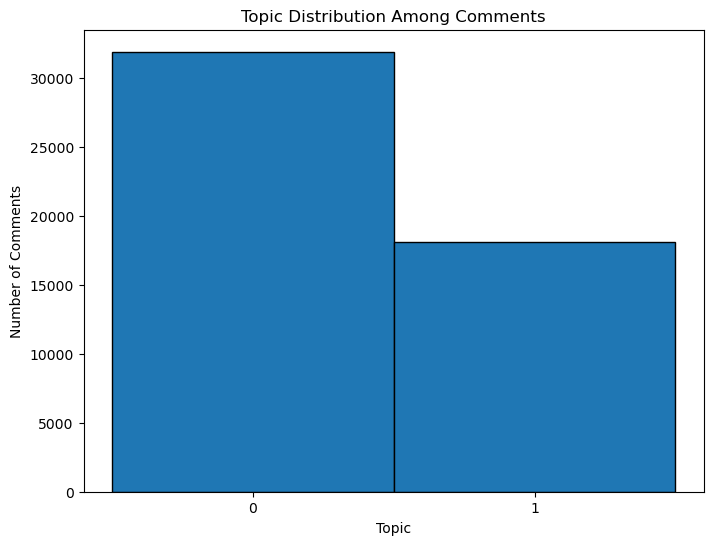

In [ ]:
# Plot the distribution of topics

plt.figure(figsize=(8, 6))
plt.hist(topic_counts, bins=range(num_topics + 1), edgecolor='black', align='left')
plt.xlabel("Topic")
plt.ylabel("Number of Comments")
plt.title("Topic Distribution Among Comments")
plt.xticks(range(num_topics))
plt.show()

In [ ]:
# Print top words for each topic

topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(f"Topic {topic[0]}: {topic[1]}")

Topic 0: 0.029*"movi" + 0.013*"film" + 0.011*"like" + 0.010*"one" + 0.008*"watch"
Topic 1: 0.018*"film" + 0.007*"one" + 0.005*"stori" + 0.004*"charact" + 0.004*"play"


# <span style = 'color: #c71585'> NLP with Word Embeddings and Deep Learning</span>

## <span style = 'color: purple'> Use word embeddings to represent comments in a dense vector space (e.g. Apply Word2Vec, GloVe).</span>

In [ ]:
# Load Pre-trained GloVe embeddings
# You can download GloVe embeddings from https://nlp.stanford.edu/projects/glove/

glove_file = "C:/Users/fatma/Desktop/Kodlasam Veri Bilimi/Makine öğrenimi projeler/NLP/glove.6B/glove.6B.50d.txt"  # Use 50-dimensional embeddings (small file size)
embeddings_index = {}

In [ ]:
# Load GloVe embeddings

embeddings_index = {}

In [ ]:
with open(glove_file, 'r', encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [ ]:
print(f"Loaded {len(embeddings_index)} word vectors from GloVe.")

Loaded 400000 word vectors from GloVe.


In [ ]:
df

,review,sentiment,tokens,dominant_topic
0,one review mention watch 1 oz episod youll hoo...,positive,"[one, review, mention, watch, 1, oz, episod, y...",1
1,wonder littl product film techniqu unassum old...,positive,"[wonder, littl, product, film, techniqu, unass...",1
2,thought wonder way spend time hot summer weeke...,positive,"[thought, wonder, way, spend, time, hot, summe...",0
3,basic there famili littl boy jake think there ...,negative,"[basic, there, famili, littl, boy, jake, think...",0
4,petter mattei love time money visual stun film...,positive,"[petter, mattei, love, time, money, visual, st...",1
...,...,...,...,...
49995,thought movi right good job wasnt creativ orig...,positive,"[thought, movi, right, good, job, wasnt, creat...",0
49996,bad plot bad dialogu bad act idiot direct anno...,negative,"[bad, plot, bad, dialogu, bad, act, idiot, dir...",0
49997,cathol taught parochi elementari school nun ta...,negative,"[cathol, taught, parochi, elementari, school, ...",1
49998,im go disagre previou comment side maltin one ...,negative,"[im, go, disagre, previou, comment, side, malt...",1


In [ ]:
def preprocess_and_vectorize(comment):
    # Tokenize and clean the text
    tokens = word_tokenize(comment.lower())  # Tokenize and convert to lowercase
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]  # Remove stopwords and punctuation

    # Retrieve word embeddings for tokens
    embedding_dim = 50  # Dimension of the GloVe embeddings
    word_vectors = [embeddings_index.get(word) for word in tokens if word in embeddings_index]

    # If tokens have embeddings, return the average; otherwise, return a zero vector
    if len(word_vectors) > 0:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(embedding_dim)

In [ ]:
# Apply the vectorization to each comment

df['vector'] = df['review'].apply(preprocess_and_vectorize)

In [ ]:
# Display the DataFrame with dense vectors

print("\nDataFrame with Dense Vectors:")
print(df[['review', 'vector']])


DataFrame with Dense Vectors:
                                                  review  \
0      one review mention watch 1 oz episod youll hoo...   
1      wonder littl product film techniqu unassum old...   
2      thought wonder way spend time hot summer weeke...   
3      basic there famili littl boy jake think there ...   
4      petter mattei love time money visual stun film...   
...                                                  ...   
49995  thought movi right good job wasnt creativ orig...   
49996  bad plot bad dialogu bad act idiot direct anno...   
49997  cathol taught parochi elementari school nun ta...   
49998  im go disagre previou comment side maltin one ...   
49999  one expect star trek movi high art fan expect ...   

                                                  vector  
0      [0.102665454, 0.09050735, -0.027731208, -0.190...  
1      [0.042518355, 0.25625673, -0.16807702, -0.1852...  
2      [0.12235197, 0.11960087, -0.016677627, -0.2056...  
3      [0.13

In [ ]:
df[['review', 'vector']].head(4)

,review,vector
0,one review mention watch 1 oz episod youll hoo...,"[0.102665454, 0.09050735, -0.027731208, -0.190..."
1,wonder littl product film techniqu unassum old...,"[0.042518355, 0.25625673, -0.16807702, -0.1852..."
2,thought wonder way spend time hot summer weeke...,"[0.12235197, 0.11960087, -0.016677627, -0.2056..."
3,basic there famili littl boy jake think there ...,"[0.13977423, 0.11780784, -0.11158189, -0.06911..."


##  <span style = 'color: purple'> A simple deep learning model for sentiment analysis using word embeddings train (e.g. LSTM or CNN).</span>

In [ ]:
embedding_matrix = np.zeros((10000, 50))

In [ ]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=50, weights=[embedding_matrix],
              input_length=50, trainable=False),  # Use pre-trained embeddings
    Bidirectional(LSTM(64, return_sequences=False)),  # LSTM with bidirectional layers
    Dropout(0.5),  # Dropout for regularization
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

In [ ]:
# Compile the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model

history = model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 280s 220ms/step - accuracy: 0.5024 - loss: 0.6932 - val_accuracy: 0.4961 - val_loss: 0.6932
Epoch 2/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 265s 212ms/step - accuracy: 0.4958 - loss: 0.6932 - val_accuracy: 0.4961 - val_loss: 0.6933
Epoch 3/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 271s 216ms/step - accuracy: 0.4956 - loss: 0.6932 - val_accuracy: 0.4961 - val_loss: 0.6932


In [ ]:
# Evaluate the model

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 82ms/step - accuracy: 0.4978 - loss: 0.6932
Test Accuracy: 0.50
